In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

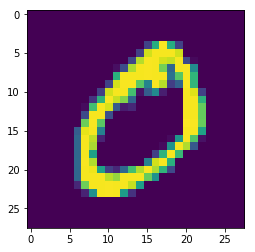

In [7]:
plt.imshow(x_train[1,:,:])

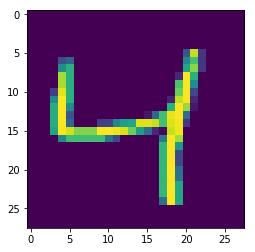

In [8]:
plt.imshow(x_train[2,:,:])

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_test.shape

(10000, 28, 28, 1)

### Introduce noise

In [12]:
noise_factor = 0.95
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

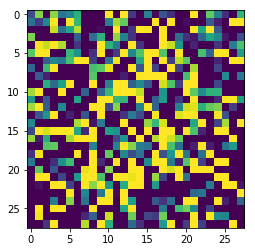

In [13]:
plt.imshow(np.reshape(x_train_noisy, (len(x_train_noisy),28,28))[1,:,:])

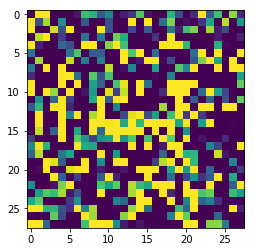

In [14]:
plt.imshow(np.reshape(x_train_noisy, (len(x_train_noisy),28,28))[2,:,:])

### The task is denoise the data
We will use convolutional autoencoder with various filters per layer

In [17]:
input_img = Input(shape=(28,28,1)) # adapt this if using `channels_first` image data format
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) # 32 output filters,(3x3) conv. window
x = MaxPooling2D((2, 2), padding='same')(x) # this is downsampling
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

print(encoded.shape)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(?, 7, 7, 32)


In [18]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 756us/step - loss: 0.2365 - val_loss: 0.1885
Epoch 2/10
60000/60000 [==============================] - 45s 751us/step - loss: 0.1809 - val_loss: 0.1709
Epoch 3/10
60000/60000 [==============================] - 45s 751us/step - loss: 0.1720 - val_loss: 0.1686
Epoch 4/10
60000/60000 [==============================] - 45s 749us/step - loss: 0.1677 - val_loss: 0.1630
Epoch 5/10
60000/60000 [==============================] - 45s 750us/step - loss: 0.1648 - val_loss: 0.1612
Epoch 6/10
60000/60000 [==============================] - 45s 748us/step - loss: 0.1631 - val_loss: 0.1594
Epoch 7/10
60000/60000 [==============================] - 45s 749us/step - loss: 0.1616 - val_loss: 0.1587
Epoch 8/10
60000/60000 [==============================] - 45s 750us/step - loss: 0.1609 - val_loss: 0.1606
Epoch 9/10
60000/60000 [==============================] - 45s 751us/step - loss: 0.1599 - val_

In [27]:
def plot_numbers(data):
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        img = data[i].reshape(28,28)
        plt.imshow(img)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

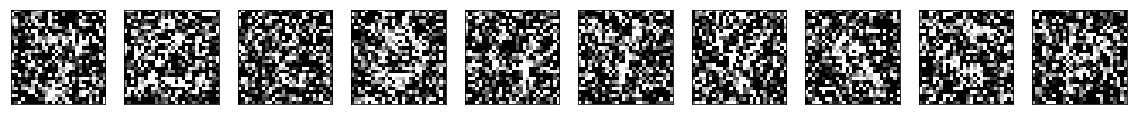

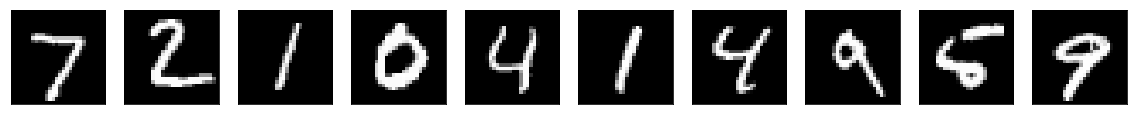

In [28]:
n = 10
plot_numbers(x_test_noisy)
plot_numbers(x_test)